In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

In [2]:
%matplotlib notebook

In [3]:
Delta = 0.01
delta = 0.01

kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)

kx2, ky2, Kx2, Ky2, E2, Psi2 = get_bands(Delta=Delta, delta=delta, twobytwo=True)
Omega2, Mu2 = berry_mu(Kx2, Ky2, E2, Psi2)

<IPython.core.display.Javascript object>


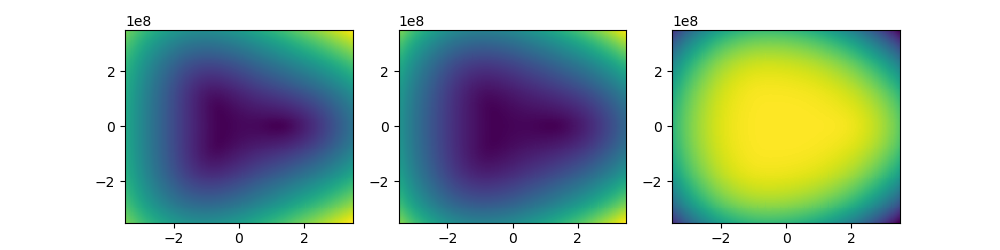

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(10,2.5))
ax[0].pcolormesh(Kx, Ky, E[2])
ax[1].pcolormesh(Kx, Ky, E2[1])
ax[2].pcolormesh(Kx, Ky, E[2]- E2[1])

In [6]:
from blg_strain.utils.const import eta0, a, nu, gamma1

<IPython.core.display.Javascript object>


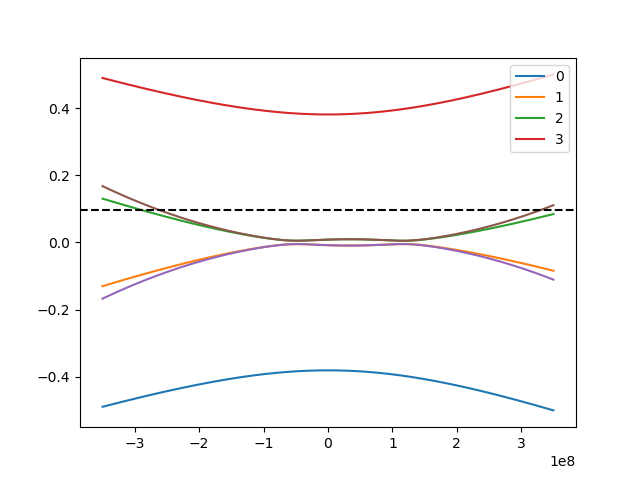

In [7]:
j = 100
fig, ax = plt.subplots()

kshift = eta0 / a * (1+nu) * delta / 2

for n in range(4):
    ax.plot(Kx[:, j], E[n][:,j], label=n)
for n in range(2):
    ax.plot(Kx[:, j], E2[n][:,j])

ax.axhline(gamma1/4, ls='--', color='k')
    
plt.legend()

# Try Berry curvature dipole

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

In [31]:
from blg_strain.utils.const import hbar, v3, meff
kL = meff * v3 / hbar  # m^-1
EL = hbar * kL * v3 / 2

In [32]:
from blg_strain.utils.params import w
w(1, 3, 1, 0).real / EL  # Value of w3 (in EL) for 100% strain

482.4114365934521

In [33]:
wEL = 5
delta = wEL / (w(1,3,1,0).real / EL)  # delta corresponding to value of wEL
delta

0.010364596733666796

In [34]:
wELs = np.array([1,3,5])
deltas = wELs/ (w(1,3,1,0).real / EL)

# 2x2

In [89]:
Delta = 0.01
EFs = np.linspace(0.0045, 0.013, 51)

# Delta = 0.02
# EFs = np.linspace(0.0095, 0.017, 51)

Ds = []
ntots = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=500, Nky=500, Delta=Delta, delta=-delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)
    
    ntot = np.empty_like(EFs)
    D = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot[i] = n_valley(kx2, ky2, f)
        D[i] = D_valley(kx2, ky2, f, splO)[1]
    
    Ds.append(D)
    ntots.append(ntot)

<IPython.core.display.Javascript object>


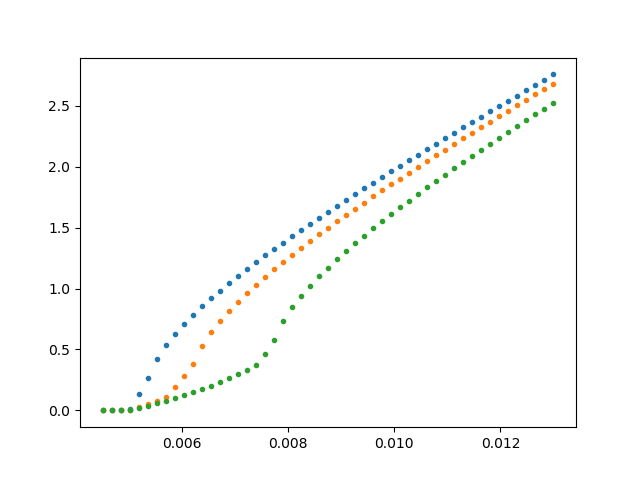

In [90]:
fig, ax = plt.subplots()
for ntot in ntots:
    ax.plot(EFs, ntot / kL**2, '.')

In [91]:
kL/1e9

0.03400664957108036

<IPython.core.display.Javascript object>


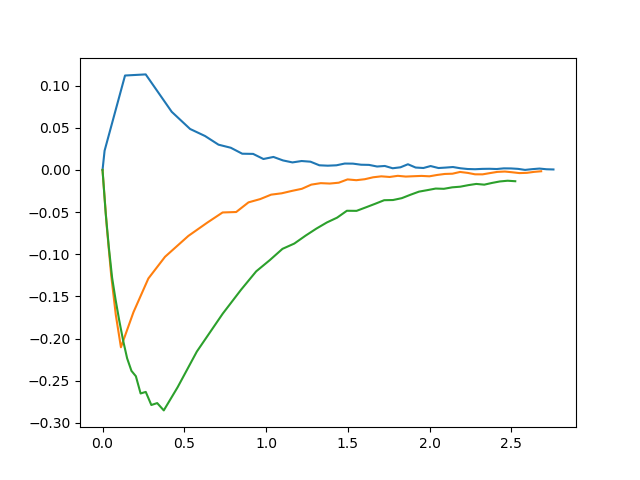

In [92]:
fig, ax = plt.subplots()

for ntot, D in zip(ntots, Ds):
    ax.plot(ntot / kL ** 2, D * kL)

# 4x4

In [15]:
Delta = 0.01
EFs = np.linspace(0.0045, 0.013, 51)


D44s = []
ntot44s = []

for delta in deltas:

    # K
    kx44, ky44, Kx44, Ky44, E44, Psi44 = get_bands(Delta=Delta, delta=delta, twobytwo=False)
    Omega44, Mu44 = berry_mu(Kx44, Ky44, E44, Psi44)
    splE44, splO44, splM44 = get_splines(kx44, ky44, E44, Omega44, Mu44)
    kx244, ky244, E244, Omega244, Mu244 = densify(kx44, ky44, splE44, splO44, splM44)
    
    ntot44 = np.empty_like(EFs)
    D44 = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f44 = feq_func(E244, EF, T=T)
        ntot44[i] = n_valley(kx244, ky244, f44, EF, T=T)
        D44[i] = D_valley(kx244, ky244, f44, splO44)[2]
    
    D44s.append(D44)
    ntot44s.append(ntot44)

<IPython.core.display.Javascript object>


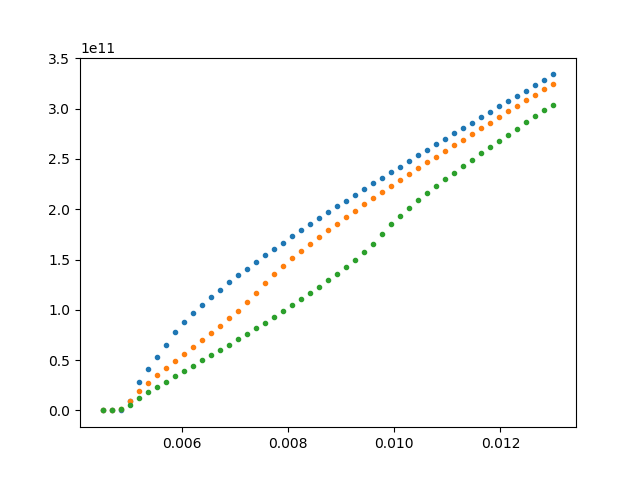

In [16]:
fig, ax = plt.subplots()
for ntot44 in ntot44s:
    ax.plot(EFs, ntot44/1e4, '.')

<IPython.core.display.Javascript object>


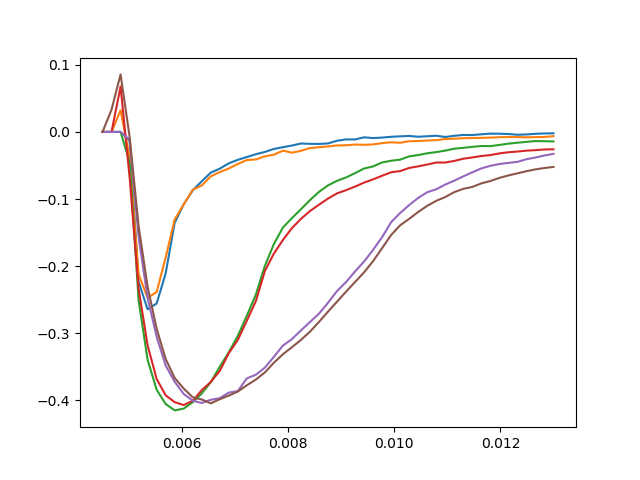

In [32]:
fig, ax = plt.subplots()

# for ntot, ntot44, D, D44 in zip(ntots, ntot44s, Ds, D44s):
#     ax.plot(ntot / kL ** 2, D * kL)
#     ax.plot(ntot44 / kL ** 2, D44 * kL)
    
    
for ntot, ntot44, D, D44 in zip(ntots, ntot44s, Ds, D44s):
    ax.plot(EFs, D * kL)
    ax.plot(EFs, D44 * kL)

# Plot bands

In [12]:
E2.shape

(2, 1000, 1000)

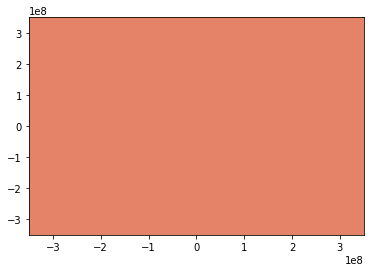

In [14]:
berry = Omega2[1].T * feq_func(E2[1].T, 0.006)

fig, ax = plt.subplots()
ax.contourf(kx2, ky2, berry, cmap='RdBu')#, vmin=-83/kL**2, vmax=0)

NameError: name 'kx244' is not defined

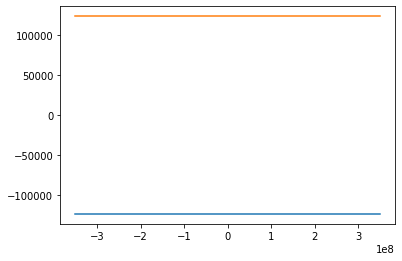

In [16]:
fig, ax = plt.subplots()

for n in range(2):
    ax.plot(kx2, E2[n][:, 500])

for n in range(4):
    ax.plot(kx244, E244[n][:, 500])

# ax.set_ylim(-0.03, 0.03)
ax.set_xlim(-2.3e8, 3e8)
# ax.plot(ky2, E2[1][350, :])
# ax.plot(ky244, E244[2][350, :])

In [29]:
EF = 0.1
f44 = feq_func(E244, EF, T=T)
n_valley(kx244, ky244, f44, EF, T=T)/1e12/1e4

F-D dist in band 2 not smaller than 0.010000 at boundaries!


3.344479798948874

# Why was dipole noisy? Would more points help? Answer: yes!

In [82]:
def recipspace(start, stop, num, shift=0):
    '''
    Returns an array of num values from start to stop whose reciprocals are linearly spaced.
    This 
    '''
    return 1/np.linspace(1/start, 1/stop, num)

<IPython.core.display.Javascript object>


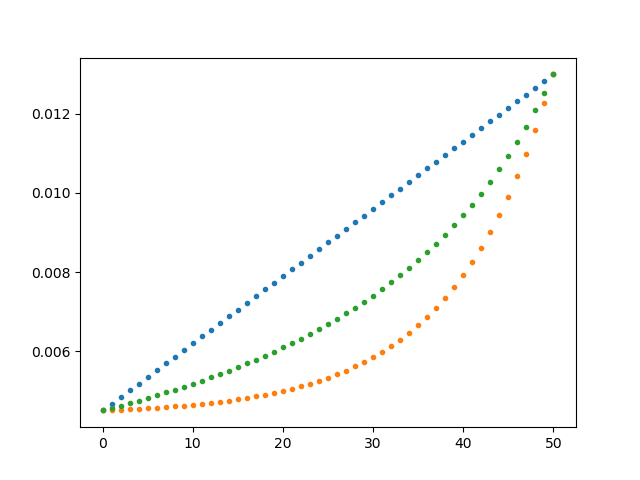

In [108]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0.0045, 0.013, 51), '.')
ax.plot(np.geomspace(0.0045-.0044, 0.013-.0044, 51)+.0044, '.')
ax.plot(recipspace(0.0045, 0.013, 51), '.')

In [98]:
Delta = 0.01
# EFs = np.linspace(0.0045, 0.013, 51)
# EFs = recipspace(0.0045, 0.013, 51)
EFs = np.geomspace(0.005-.0049, 0.013-.0049, 51)+.0049


Ds = []
ntots = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=-delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM, Nkx_new=2000, Nky_new=2000)
    
    ntot = np.empty_like(EFs)
    D = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot[i] = n_valley(kx2, ky2, f)
        D[i] = D_valley(kx2, ky2, f, splO)[1]
    
    Ds.append(D)
    ntots.append(ntot)
# np.savez('2x2_smooth_berry_dipole.npz', deltas=deltas, ntots=ntots, Ds=Ds)

In [99]:
# data = np.load('2x2_smooth_berry_dipole.npz')
# deltas, ntots, Ds = data['deltas'], data['ntots'], data['Ds']

<IPython.core.display.Javascript object>


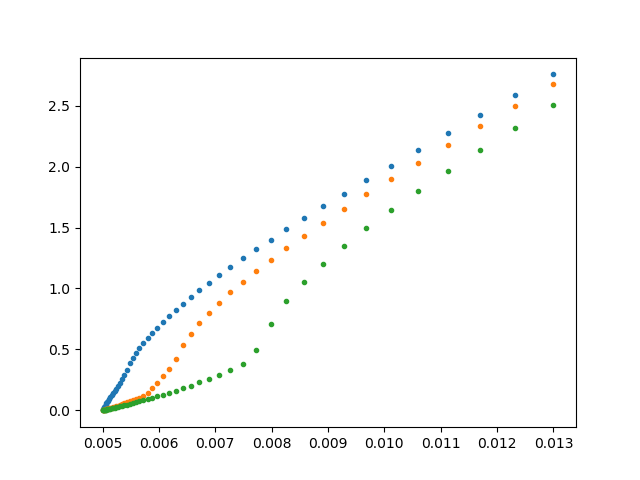

In [100]:
fig, ax = plt.subplots()
for ntot in ntots:
    ax.plot(EFs, ntot / kL**2, '.')

In [101]:
ntot

array([0.00000000e+00, 1.06848689e+12, 2.28606497e+12, 3.62788572e+12,
       5.09394912e+12, 6.60970960e+12, 8.24971273e+12, 1.02624438e+13,
       1.23745691e+13, 1.46357855e+13, 1.70460932e+13, 1.98291288e+13,
       2.29351953e+13, 2.62648987e+13, 2.97933902e+13, 3.40176407e+13,
       3.83164368e+13, 4.32115977e+13, 4.86782748e+13, 5.46667711e+13,
       6.12019351e+13, 6.85819492e+13, 7.67074192e+13, 8.58516791e+13,
       9.57165465e+13, 1.06972932e+14, 1.19123864e+14, 1.33362073e+14,
       1.49016648e+14, 1.66733652e+14, 1.86687023e+14, 2.09249491e+14,
       2.35166510e+14, 2.64835657e+14, 2.99151481e+14, 3.39207315e+14,
       3.86568617e+14, 4.44167515e+14, 5.69901089e+14, 8.23703998e+14,
       1.03981168e+15, 1.22031142e+15, 1.39084690e+15, 1.55892237e+15,
       1.72888633e+15, 1.90282606e+15, 2.08287852e+15, 2.27125525e+15,
       2.46962108e+15, 2.67824936e+15, 2.90061887e+15])

In [102]:
D*1e9

array([ 0.        , -0.0790152 , -0.17182917, -0.26969876, -0.3699861 ,
       -0.48856538, -0.6078846 , -0.73501218, -0.87873343, -1.0450024 ,
       -1.18513621, -1.36231227, -1.56912614, -1.72647552, -1.89691678,
       -2.17361432, -2.37751022, -2.65242262, -2.89130255, -3.1824397 ,
       -3.49181672, -3.79391546, -4.05180447, -4.41150463, -4.6416973 ,
       -5.0017607 , -5.39888574, -5.64778077, -6.01732019, -6.30585873,
       -6.66170223, -6.94063085, -7.25205722, -7.46476285, -7.74496837,
       -7.95303205, -8.18611914, -8.26559829, -7.30847714, -5.23351839,
       -3.9173201 , -3.07046421, -2.49070759, -1.98451399, -1.57784401,
       -1.25766691, -0.9994984 , -0.80644221, -0.63825752, -0.52548352,
       -0.4010209 ])

<IPython.core.display.Javascript object>


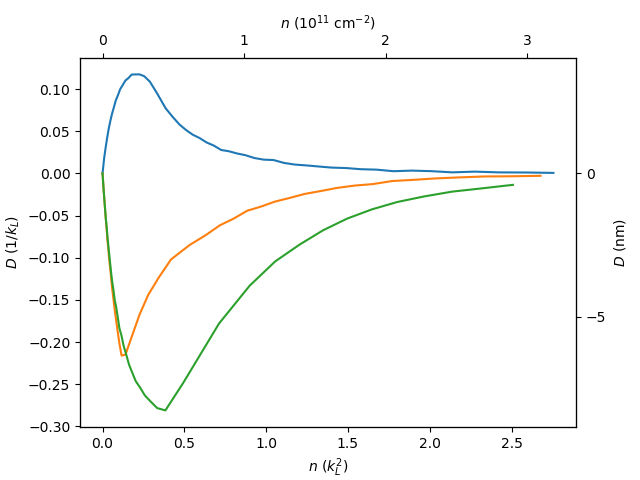

In [103]:
fig, ax = plt.subplots()

for ntot, D in zip(ntots, Ds):
#     ax.plot(EFs, D * kL)
    ax.plot(ntot / kL ** 2, D * kL, '-')
    
ax.set_xlabel('$n$ ($k_L^{2}$)')
ax.set_ylabel('$D$ ($1/k_L$)')
    
axtwin = ax.twinx()
ax2 = axtwin.twiny()
ax2.set_xlim([xlim * kL**2 / 1e4 / 1e11 for xlim in ax.get_xlim()])
ax2.set_ylim([ylim / kL * 1e9 for ylim in ax.get_ylim()])

ax2.set_xticks([0, 1, 2, 3])
ax2.set_yticks([-10, -5, 0, ])
# ax2.set_xticklabels(['%.2f' %(tick * kL **2 /1e4/1e11) for tick in ax.get_xticks()])
# ax2.set_yticklabels([tick * kL for tick in ax.get_yticks()])


ax2.set_xlabel('$n$ ($10^{11}$ cm$^{-2}$)')
axtwin.set_ylabel('$D$ (nm)')

fig.subplots_adjust(right=0.9)

# Plot 2x2 bands to try to match Battilomo exactly

Berry curvature is about a factor of 2 higher in my calculations, but all the topology looks good. Derivative is also about the same factor larger, so I am probably taking the gradient correctly. How does this result in a factor of 10 larger Berry dipole in my calculations?

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

from blg_strain.utils.params import w_to_delta
from blg_strain.utils.const import kL, EL, meff

In [12]:
%matplotlib notebook

In [15]:
Delta = 0.001
delta = w_to_delta(-EL)

kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta, Nkx=500, Nky=500, twobytwo=True)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)
splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM, Nkx_new=2000, Nky_new=2000)

<IPython.core.display.Javascript object>


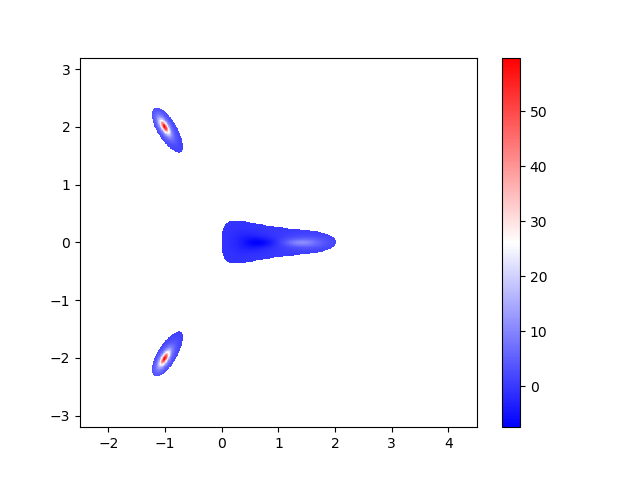

<IPython.core.display.Javascript object>


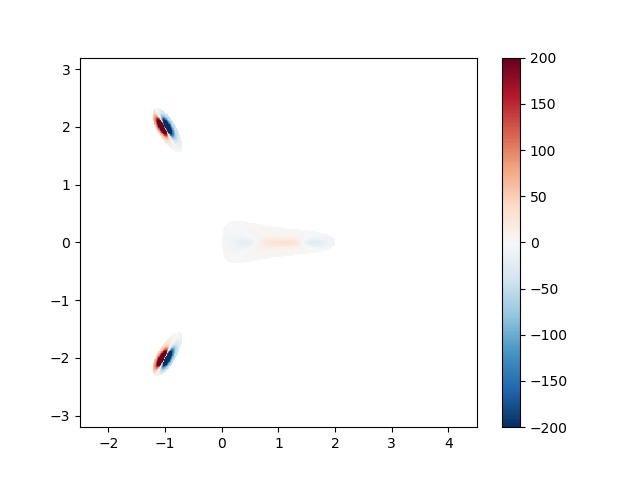

(-3.2, 3.2)

In [16]:
EF = 1.47e-3  #EL
# EF = EL+Delta/2
f = feq_func(E2[1], EF, 0)

Of = Omega2[1] * f 
om = np.ma.masked_where(E2[1] > EF, Of)

fig, ax = plt.subplots()
im = ax.pcolormesh(kx2/kL, ky2/kL, om.T*kL**2, cmap='bwr')#, vmin=-25, vmax=8)
plt.colorbar(im)
ax.set_xlim(-2.5, 4.5)
ax.set_ylim(-3.2, 3.2)
    

fig, ax = plt.subplots()
im = ax.pcolormesh(kx2/kL, ky2/kL, np.gradient(om, kx2, axis=0).T*kL**3, cmap='RdBu_r', vmin=-200, vmax=200)
plt.colorbar(im)
ax.set_xlim(-2.5, 4.5)
ax.set_ylim(-3.2, 3.2)
    

# Consider Berry dipole in each valley

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

from blg_strain.utils.params import w_to_delta
from blg_strain.utils.const import kL, EL, meff

In [5]:
wELs = np.array([1,3,5])*EL
deltas = w_to_delta(wELs)

# 2x2

In [10]:
deltas

array([0.00207292, 0.00621876, 0.0103646 ])

In [13]:
Delta = 0.01
EFs = np.linspace(0.0045, 0.013, 51)

Ds = []
ntots = []

Dps = []
ntotps = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
    Omega, Mu = berry_mu(Kx, Ky, E, Psi)
    splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
    kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM)

    # K'
    kxp, kyp, Kxp, Kyp, Ep, Psip = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True, xi=-1)
    Omegap, Mup = berry_mu(Kxp, Kyp, Ep, Psip)
    splEp, splOp, splMp = get_splines(kxp, kyp, Ep, Omegap, Mup)
    kxp2, kyp2, Ep2, Omegap2, Mup2 = densify(kxp, kyp, splEp, splOp, splMp)
    
    
    ntot = np.empty_like(EFs)
    D = np.empty_like(EFs)
    ntotp = np.empty_like(EFs)
    Dp = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot[i] = n_valley(kx2, ky2, f)
        D[i] = D_valley(kx2, ky2, f, splO)[1]
    
        fp = feq_func(Ep2, EF, T=T)
        ntotp[i] = n_valley(kxp2, kyp2, fp)
        Dp[i] = D_valley(kxp2, kyp2, fp, splOp)[1]
    
    
    Ds.append(D)
    ntots.append(ntot)    
    
    Dps.append(Dp)
    ntotps.append(ntotp)

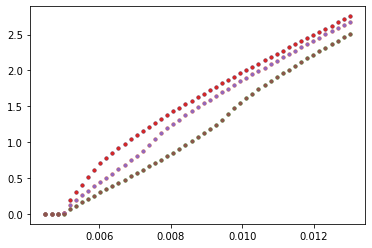

In [14]:
fig, ax = plt.subplots()
for ntot in ntots:
    ax.plot(EFs, ntot / kL**2, '.')
    
for ntotp in ntotps:
    ax.plot(EFs, ntotp / kL**2, '.')

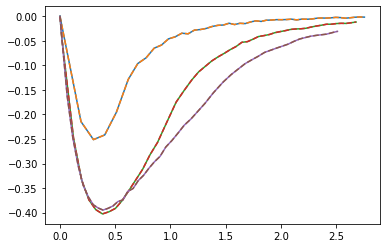

In [15]:
fig, ax = plt.subplots()

for ntot, D, ntotp, Dp in zip(ntots, Ds, ntotps, Dps):
    ax.plot(ntot / kL ** 2, D * kL)
    ax.plot(ntotp / kL ** 2, Dp * kL, '--')
#     ax.plot(ntotp / kL ** 2, (Dp+D) * kL, '--')

# Test density functions

In [2]:
kx, ky, Kx, Ky, E, Psi = get_bands(xi=1, Delta=0.01, delta=0.01, twobytwo=False)
# kx2, ky2, E2 = densify(kx, ky, splE, Nkx_new=2000, Nky_new=2000)

kxp, kyp, Kxp, Kyp, Ep, Psip = get_bands(xi=1, Delta=0.01, delta=0.01, twobytwo=False)
# kxp2, kyp2, Ep2 = densify(kx, ky, splE, Nkx_new=2000, Nky_new=2000)

In [3]:
from blg_strain.macroscopic import n_layer, n_valley, n_valley_layer, ntot_func

In [4]:
EFs = np.linspace(0.0045, 0.013, 51)


In [13]:
nl1s = np.empty_like(EFs)
nl2s = np.empty_like(EFs)
nvs = np.empty_like(EFs)
nvps = np.empty_like(EFs)
nvl1s = np.empty_like(EFs)
nvlp1s = np.empty_like(EFs)
nvl2s = np.empty_like(EFs)
nvlp2s = np.empty_like(EFs)
nts = np.empty_like(EFs)

T=0
for i, EF in enumerate(EFs):
    f = feq_func(E, EF, T=T)
    fp = feq_func(Ep, EF, T=T)
    
    nvs[i] = n_valley(kx, ky, f)
    nvps[i] = n_valley(kxp, kyp, fp)
    nvl1s[i] = n_valley_layer(kx, ky, f, Psi, layer=1)
    nvlp1s[i] = n_valley_layer(kxp, kyp, fp, Psip, layer=1)
    nvl2s[i] = n_valley_layer(kx, ky, f, Psi, layer=2)
    nvlp2s[i] = n_valley_layer(kxp, kyp, fp, Psip, layer=2)
    nl1s[i] = n_layer(kx, ky, f, fp, Psi, Psip, layer=1)
    nl2s[i] = n_layer(kx, ky, f, fp, Psi, Psip, layer=2)
    nts[i] = ntot_func(kx, ky, f, fp)

In [15]:
%matplotlib notebook

Carrier density in each valley/layer - different for each layer but same across valleys - all sum up to total

<IPython.core.display.Javascript object>


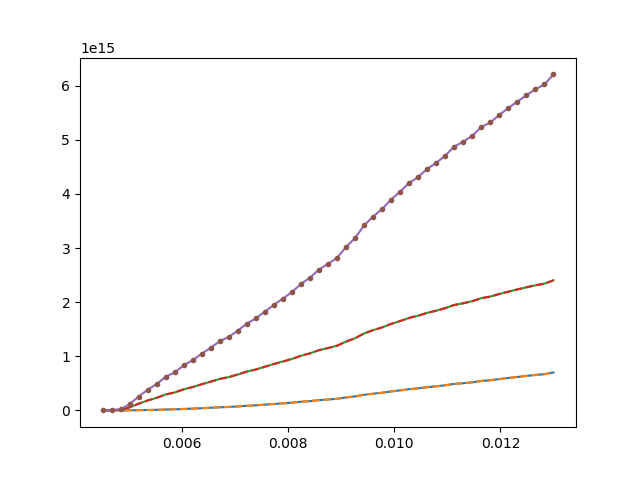

In [27]:
fig, ax = plt.subplots()

ax.plot(EFs, nvl1s, '-')
ax.plot(EFs, nvlp1s, '--')
ax.plot(EFs, nvl2s, '-')
ax.plot(EFs, nvlp2s, '--')
ax.plot(EFs, nts)
ax.plot(EFs, nvl1s+nvl2s+nvlp1s+nvlp2s, '.')

Equal carrier density in each valley (contributions from both layers) - sum to total

<IPython.core.display.Javascript object>


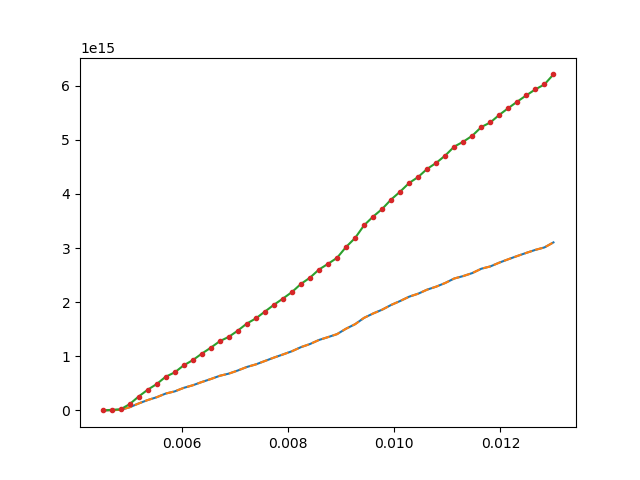

In [23]:
fig, ax = plt.subplots()

ax.plot(EFs, nvs, '-')
ax.plot(EFs, nvps, '--')
ax.plot(EFs, nts)
ax.plot(EFs, nvs+nvps, '.')

Different carrier density in each layer (contributions from both valleys) - sum to total

<IPython.core.display.Javascript object>


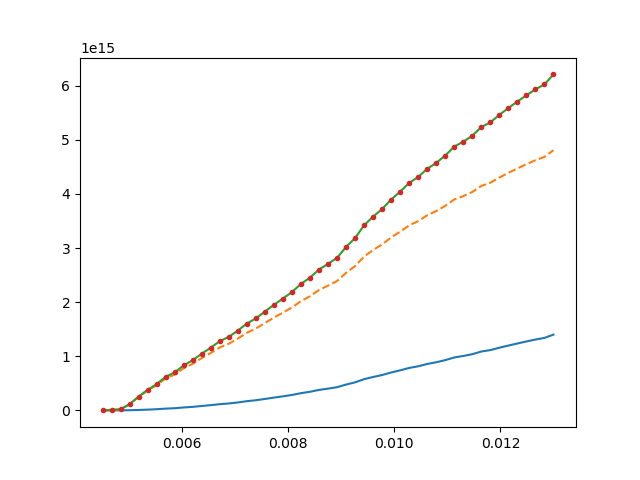

In [28]:
fig, ax = plt.subplots()

ax.plot(EFs, nl1s, '-')
ax.plot(EFs, nl2s, '--')
ax.plot(EFs, nts)
ax.plot(EFs, nl1s+nl2s, '.')

# Try to engineer the order of magnitude for Berry dipole

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

from blg_strain.utils.params import w_to_delta
from blg_strain.utils.const import kL, EL, meff

In [52]:
%matplotlib notebook

In [82]:
Delta = 0.001
# delta = w_to_delta(-EL)
delta = 0

kx, ky, Kx, Ky, E, Psi = get_bands(Delta=Delta, delta=delta, Nkx=500, Nky=500, twobytwo=True)
Omega, Mu = berry_mu(Kx, Ky, E, Psi)
splE, splO, splM = get_splines(kx, ky, E, Omega, Mu)
kx2, ky2, E2, Omega2, Mu2 = densify(kx, ky, splE, splO, splM, Nkx_new=2000, Nky_new=2000)

In [83]:
E2[1].min()

0.0005004204659523018

<IPython.core.display.Javascript object>


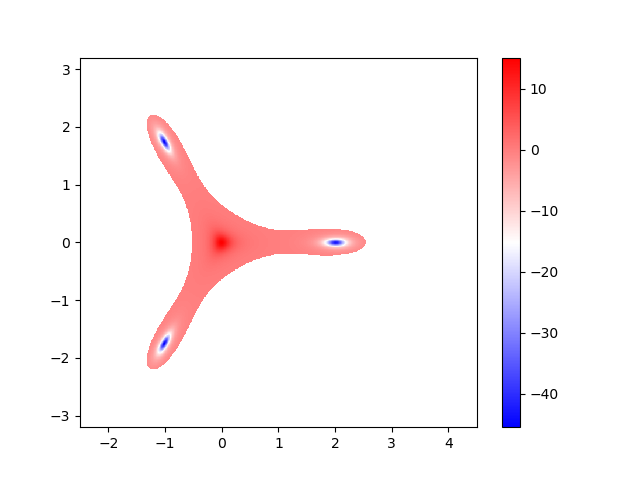

<IPython.core.display.Javascript object>


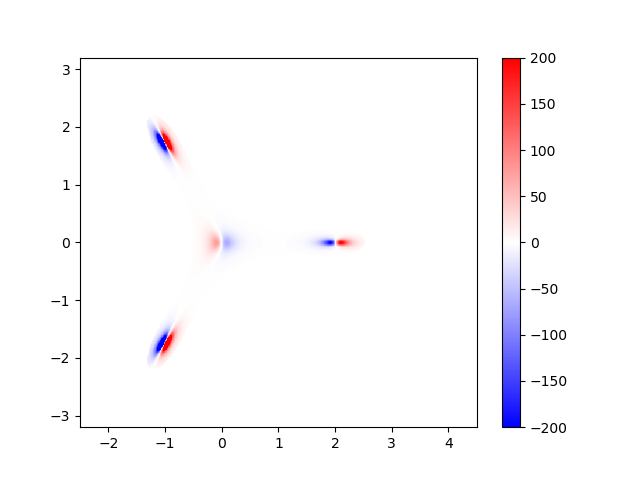

(-3.2, 3.2)

In [84]:
# EF = 1.47e-3  #EL
# EF = EL + Delta/2
EF = EL + E2[1].min()
f = feq_func(E2[1], EF, 0)

Of = Omega2[1] * f 
om = np.ma.masked_where(E2[1] > EF, Of)

fig, ax = plt.subplots()
im = ax.pcolormesh(kx2/kL, ky2/kL, -om.T*kL**2, cmap='bwr')#, vmin=-25, vmax=8)
plt.colorbar(im)
ax.set_xlim(-2.5, 4.5)
ax.set_ylim(-3.2, 3.2)
    

fig, ax = plt.subplots()
im = ax.pcolormesh(kx2/kL, ky2/kL, np.gradient(-om, kx2, axis=0).T*kL**3, cmap='bwr', vmin=-200, vmax=200)
plt.colorbar(im)
ax.set_xlim(-2.5, 4.5)
ax.set_ylim(-3.2, 3.2)
    

# Berry curvature from wavefunctions directly

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

from blg_strain.utils.params import w_to_delta
from blg_strain.utils.const import kL, EL, meff

In [35]:
Delta = 0.01
delta = 0.01
kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True)
splPr, splPi = get_splines(kx, ky, Psi.real, Psi.imag)
kx2, ky2, Pr2, Pi2 = densify(kx, ky, splPr, splPi, Nkx_new=2000, Nky_new=2000)

In [36]:
Ax, Ay = berry_connection(kx2, ky2, splPr, splPi)
O = berry_from_connection(kx2, ky2, Ax, Ay)

<IPython.core.display.Javascript object>


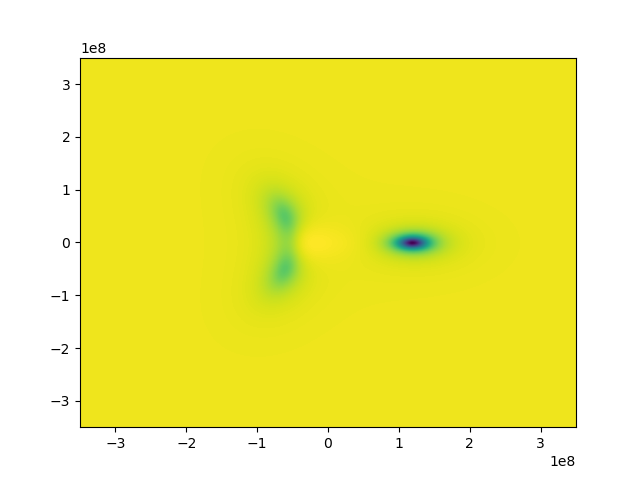

In [47]:
fig, ax = plt.subplots()
ax.pcolormesh(kx2, ky2, O[0].T.real)

<IPython.core.display.Javascript object>


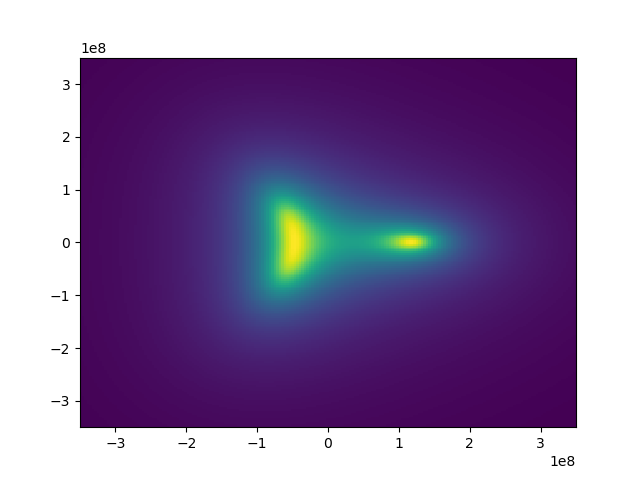

In [42]:
fig, ax = plt.subplots()
ax.pcolormesh(kx, ky, Psi[1,1].T.real)

<IPython.core.display.Javascript object>


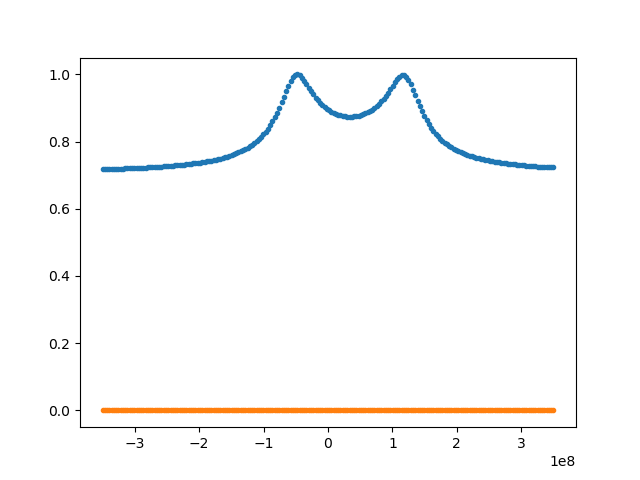

In [41]:
fig, ax = plt.subplots()
ax.plot(kx, Psi[1,1,:,100].T.real, '.')
ax.plot(kx, Psi[1,1,:,100].T.imag, '.')

In [39]:
from blg_strain.utils.plotting import plot_bands_3d

In [40]:
for n in range(2): # Index over bands
    psi = Pr2[n] + 1j * Pi2[n]
    psi_dkx = np.empty_like(psi)
    psi_dky = np.empty_like(psi)
    
    for m in range(2): # Index over components of eigenvector
        psi_dkx[m] = splPr[n,m](kx2, ky2, dx=1) + 1j * splPi[n,m](kx2, ky2, dx=1)
        psi_dky[m] = splPr[n,m](kx2, ky2, dy=1) + 1j * splPi[n,m](kx2, ky2, dy=1)
    
    Ax = 1j * np.einsum('ijk,ijk->jk', psi.conjugate(), psi_dkx, optimize=True)
    Ay = 1j * np.einsum('ijk,ijk->jk', psi.conjugate(), psi_dky, optimize=True)
    Az = np.zeros_like(psi_n)

NameError: name 'psi_n' is not defined

In [64]:
psi_dkx[:,0,0], psi.conjugate()[:,0,0]

(array([-2.31424047e-11+0.00000000e+00j,  2.26713626e-09-2.09583609e-10j]),
 array([ 0.70038451-0.j        , -0.05861341+0.71135505j]))

In [59]:
splPr[n,m](kx2, ky2, dx=1), splPi[n,m](kx2, ky2, dx=1)

(array([[ 2.26713626e-09,  2.26624989e-09,  2.26535558e-09, ...,
          2.26535558e-09,  2.26624989e-09,  2.26713626e-09],
        [ 2.27060576e-09,  2.26972457e-09,  2.26883543e-09, ...,
          2.26883543e-09,  2.26972457e-09,  2.27060576e-09],
        [ 2.27407855e-09,  2.27320258e-09,  2.27231864e-09, ...,
          2.27231864e-09,  2.27320258e-09,  2.27407855e-09],
        ...,
        [-1.84841184e-09, -1.84908834e-09, -1.84976406e-09, ...,
         -1.84976406e-09, -1.84908834e-09, -1.84841184e-09],
        [-1.84740058e-09, -1.84807441e-09, -1.84874745e-09, ...,
         -1.84874745e-09, -1.84807441e-09, -1.84740058e-09],
        [-1.84638775e-09, -1.84705890e-09, -1.84772926e-09, ...,
         -1.84772926e-09, -1.84705890e-09, -1.84638775e-09]]),
 array([[-2.09583609e-10, -2.12257588e-10, -2.14931784e-10, ...,
          2.14931784e-10,  2.12257588e-10,  2.09583609e-10],
        [-2.07343879e-10, -2.10023757e-10, -2.12703875e-10, ...,
          2.12703875e-10,  2.10023757e

In [66]:
Ax.shape

(2000, 2000)

In [72]:
sx, sy = get_splines(kx2, ky2, Ax, Ay)
Oz = np.empty_like(E2)
for n in range(Oz.shape[0]):
    Oz[n] = sy[n](kx2, ky2, dx=1) - sx[n](kx2, ky2, dy=1)

IndexError: too many indices for array

In [75]:
Ax.shape

(2000, 2000)

# Wave function discontinuities?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

from blg_strain.utils.params import w_to_delta
from blg_strain.utils.const import kL, EL, meff

In [2]:
from blg_strain.utils.plotting import plot_bands_3d

In [3]:
%matplotlib notebook

In [6]:
Delta = 0.01
delta = 0.01
kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=False, eigh=False)

Psi = Psi.transpose(1,0,2,3)
# multiplier = 2 * (Psi[2, :, :, :].real > 0) - 1  # shape 4 x Nkx x Nky
# Psi *= multiplier  # flips sign of eigenvectors where 1st component is -ive
Psi = Psi.transpose(1,0,2,3)

<IPython.core.display.Javascript object>


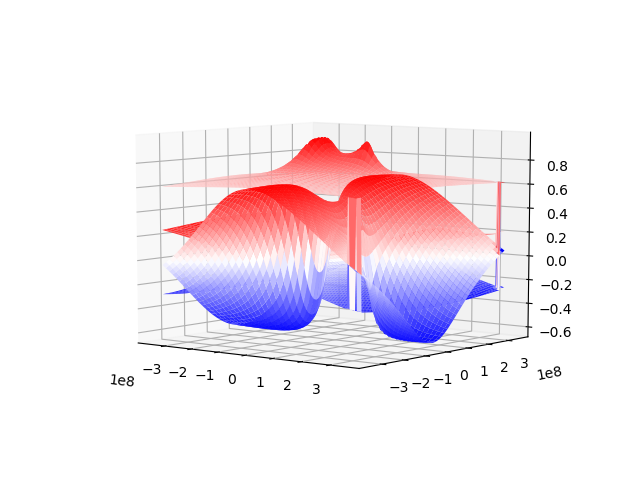

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x18b1b989a08>)

In [9]:
plot_bands_3d(Kx, Ky, Psi[2,:].real)

In [28]:
Psi[2,1].imag

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.61384029,  0.61461876,  0.61536149, ..., -0.61536149,
        -0.61461876, -0.61384029],
       [ 0.61386361,  0.61458788,  0.61527566, ..., -0.61527566,
        -0.61458788, -0.61386361],
       [ 0.61382209,  0.61449227,  0.61512524, ..., -0.61512524,
        -0.61449227, -0.61382209]])

<IPython.core.display.Javascript object>


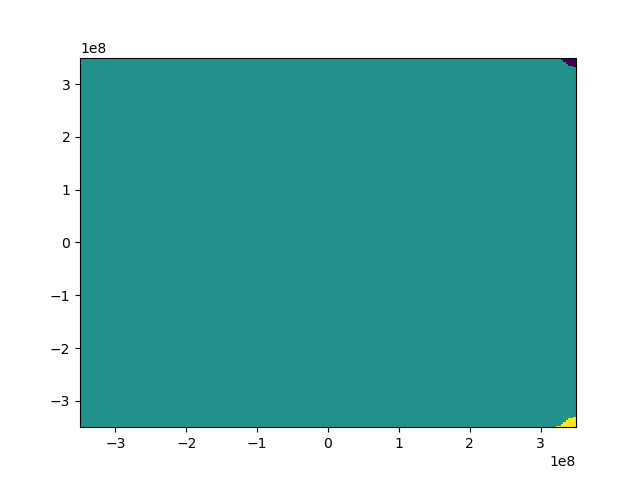

In [10]:
fig, ax = plt.subplots()

ax.pcolormesh(kx, ky, Psi[2,1].T.imag)


<IPython.core.display.Javascript object>


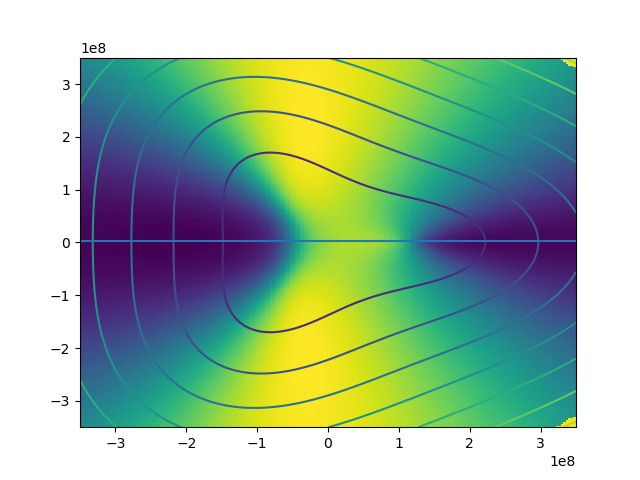

C:\Users\Brian\Anaconda3\lib\site-packages\numpy\ma\core.py:2795: ComplexWarning: Casting complex values to real discards the imaginary part
  order=order, subok=True, ndmin=ndmin)


In [11]:
fig, ax = plt.subplots()

n,m = 2,0
r = Psi[n,m].T.real
i = Psi[n,m].T.imag
a = np.angle(Psi[n,m].T)

ax.pcolormesh(kx, ky, r)
ax.axhline(ky[100])
# ax.pcolormesh(kx, ky, Psi[2,3].T.imag)
ax.contour(kx, ky, E[2].T)

<IPython.core.display.Javascript object>


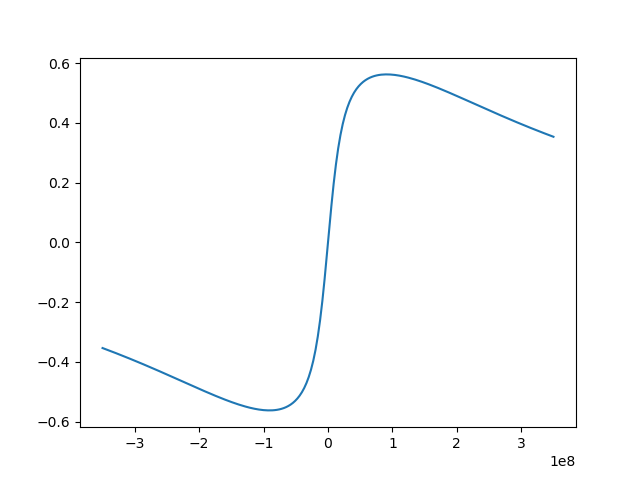

In [30]:
fig, ax = plt.subplots()
ax.plot(kx, i[:, 125])

## Ham

In [1]:
from blg_strain.hamiltonian import Hfunc

In [2]:
kx = np.linspace(-1,1)
ky = np.linspace(-1,1)
Kx, Ky = np.meshgrid(kx,ky)

NameError: name 'np' is not defined

In [3]:
H = Hfunc(Kx, Ky, xi=1, delta=0.01, Delta=0.01).transpose(2,3,0,1)

NameError: name 'Kx' is not defined

In [4]:
E, Psi = np.linalg.eig(H)
E = E.transpose(2,0,1) # put the kx,ky points in last 2 dims
Psi = Psi.transpose(2,3,0,1)
idx = E.argsort(axis=0)
# Psi = Psi.transpose(2,3,0,1)
# Psi[3,:]

NameError: name 'np' is not defined

In [11]:
arg = np.argsort(E, axis=0)

In [13]:
arg.shape

(4, 50, 50)

In [14]:
E.argsort(axis=0).shape

(4, 50, 50)

In [33]:
arg = np.unravel_index(arg, E.shape)

In [34]:
Psi[n].shape

(4, 50, 50)

In [35]:
arg.shape

AttributeError: 'tuple' object has no attribute 'shape'

In [36]:
for n in range(4):
    Psi[n] = Psi[n][arg]
# Psi[arg].shape

In [9]:
H[0,0].dot(Psi[0,0]), E[0,0]*Psi[0,0]

(array([[ 0.21606326-5.55111512e-17j,  0.10469668+1.24900090e-16j,
          0.10464079+9.71445147e-17j, -0.20931406+4.16333634e-17j],
        [ 0.0183157 -2.08511181e-01j,  0.00668575+1.04426983e-01j,
         -0.00668932-1.04482767e-01j,  0.01890628-2.15234486e-01j],
        [-0.23382154-2.59554674e-01j,  0.04340887+4.79988979e-02j,
          0.04107214+4.59381322e-02j,  0.23738937+2.64412562e-01j],
        [ 0.24262595+2.59615806e-01j,  0.04846847+3.80531221e-02j,
         -0.05067432-4.02534128e-02j,  0.23809889+2.55636576e-01j]]),
 array([[ 0.21606326-0.j        ,  0.10469668-0.j        ,
          0.10464079+0.j        , -0.20931406+0.j        ],
        [ 0.0183157 -0.20851118j,  0.00668575+0.10442698j,
         -0.00668932-0.10448277j,  0.01890628-0.21523449j],
        [-0.23382154-0.25955467j,  0.04340887+0.0479989j ,
          0.04107214+0.04593813j,  0.23738937+0.26441256j],
        [ 0.24262595+0.25961581j,  0.04846847+0.03805312j,
         -0.05067432-0.04025341j,  0.23809

In [65]:
A = np.array([
    [1,2,3],
    [6,10,9]
])
B = np.array([
    [1, 2, 3],
    [6, 7, 9]
])

In [117]:
ind = np.indices(A.shape)

In [119]:
ind[1] = A.argsort(axis=1)

In [130]:
A[tuple(ind)]

array([[ 1,  2,  3],
       [ 6,  9, 10]])

In [131]:
B[tuple(ind)]

array([[1, 2, 3],
       [6, 9, 7]])

In [135]:
E.shape

(2, 200, 200)

In [138]:
np.indices(E.shape).shape

(3, 2, 200, 200)

In [139]:
np.indices(Psi.shape).shape

(4, 2, 2, 200, 200)

In [140]:
indE = np.indices(E.shape)
indP = np.indices(Psi.shape)

In [144]:
indE[0] = E.argsort(axis=0)

In [153]:
indP[1] = indE[0]

In [151]:
indP.shape

(4, 2, 2, 200, 200)

In [146]:
E[tuple(ind)][:,0,0]

array([-0.26422781+2.77506058e-17j,  0.26422781-2.77506058e-17j])

In [185]:
A = np.array([
    [1,4],
    [2,6],
    [3,5]
])
B = np.array([[
    [1,4],
    [2,6],
    [3,5]
],
[        
    [1,4],
    [2,5],
    [3,6]
    ]])

In [186]:
A.shape, B.shape

((3, 2), (2, 3, 2))

In [187]:
indA = np.indices(A.shape)
indB = np.indices(B.shape)

In [188]:
indA.shape, indB.shape

((2, 3, 2), (3, 2, 3, 2))

In [189]:
indA[0] = A.argsort(axis=0)
indB[1] = A.argsort(axis=0)

In [190]:
A[tuple(indA)], B[tuple(indB)]

(array([[1, 4],
        [2, 5],
        [3, 6]]), array([[[1, 4],
         [2, 5],
         [3, 6]],
 
        [[1, 4],
         [2, 6],
         [3, 5]]]))

# Berry connection using eig

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

from blg_strain.utils.params import w_to_delta
from blg_strain.utils.const import kL, EL, meff

In [13]:
Delta = 0.01
delta = 0.01
kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=200, Nky=200, Delta=Delta, delta=delta, twobytwo=True, eigh=False)
splPr, splPi = get_splines(kx, ky, Psi.real, Psi.imag)
kx2, ky2, Pr2, Pi2 = densify(kx, ky, splPr, splPi, Nkx_new=2000, Nky_new=2000)

In [14]:
Ax, Ay = berry_connection(kx2, ky2, splPr, splPi)
O = berry_from_connection(kx2, ky2, Ax, Ay)

<IPython.core.display.Javascript object>


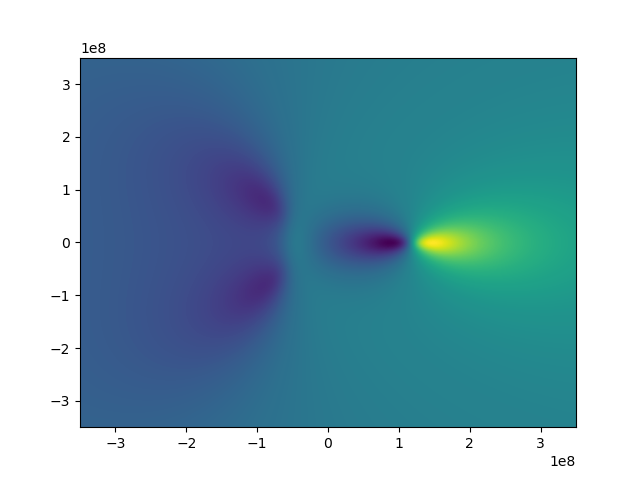

In [20]:
fig, ax = plt.subplots()
ax.pcolormesh(kx2, ky2, Ay[1].T.real)

<IPython.core.display.Javascript object>


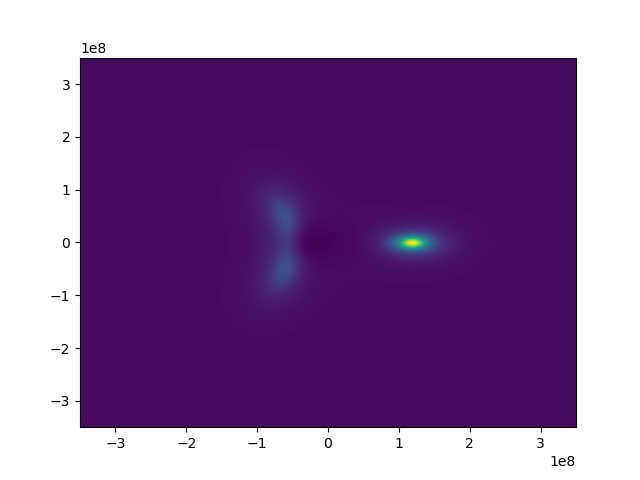

In [16]:
fig, ax = plt.subplots()
ax.pcolormesh(kx2, ky2, O[1].T.real)

# Berry dipole using this new calculation for curvature

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

from blg_strain.bands import get_bands
from blg_strain.berry import berry_mu, berry_connection, berry_from_connection
from blg_strain.utils.utils import get_splines
from blg_strain.utils.utils import densify
from blg_strain.microscopic import feq_func
from blg_strain.macroscopic import D_valley, ntot_func, D_func, n_valley

In [2]:
from blg_strain.utils.const import hbar, v3, meff
kL = meff * v3 / hbar  # m^-1
EL = hbar * kL * v3 / 2

In [3]:
from blg_strain.utils.params import w
w(1, 3, 1, 0).real / EL  # Value of w3 (in EL) for 100% strain

482.4114365934521

In [4]:
wEL = 5
delta = wEL / (w(1,3,1,0).real / EL)  # delta corresponding to value of wEL
delta

0.010364596733666796

In [5]:
wELs = np.array([1,3,5])
deltas = wELs/ (w(1,3,1,0).real / EL)

# 2x2

In [11]:
Delta = 0.01
EFs = np.linspace(0.0045, 0.013, 51)

# Delta = 0.02
# EFs = np.linspace(0.0095, 0.017, 51)

Ds = []
ntots = []

for delta in deltas:

    # K
    kx, ky, Kx, Ky, E, Psi = get_bands(Nkx=500, Nky=500, Delta=Delta, delta=delta, twobytwo=True, eigh=False)
    
    splE, splPr, splPi = get_splines(kx, ky, E, Psi.real, Psi.imag)
    kx2, ky2, E2, Pr2, Pi2 = densify(kx, ky, splE, splPr, splPi, Nkx_new=2000, Nky_new=2000)
    
    Ax, Ay = berry_connection(kx2, ky2, splPr, splPi)
    O = berry_from_connection(kx2, ky2, Ax, Ay).real

    splO = get_splines(kx2, ky2, O)
    
    ntot = np.empty_like(EFs)
    D = np.empty_like(EFs)

    T=0
    for i, EF in enumerate(EFs):
        f = feq_func(E2, EF, T=T)
        ntot[i] = n_valley(kx2, ky2, f)
        D[i] = D_valley(kx2, ky2, f, splO)[1]
    
    Ds.append(D)
    ntots.append(ntot)

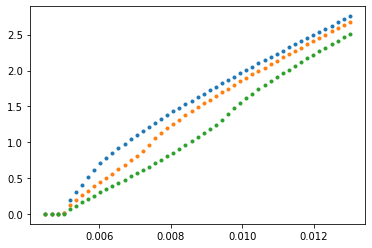

In [12]:
fig, ax = plt.subplots()
for ntot in ntots:
    ax.plot(EFs, ntot / kL**2, '.')

In [13]:
kL/1e9

0.03400664957108036

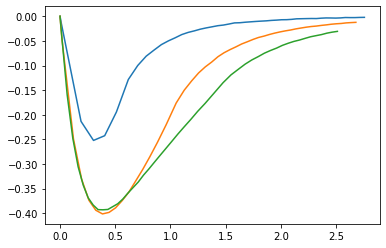

In [14]:
fig, ax = plt.subplots()

for ntot, D in zip(ntots, Ds):
    ax.plot(ntot / kL ** 2, D * kL)